# First introduction from the data science handbook

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn

In [2]:
# Get the iris dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- Features matrix: the two-dimensional array holding the dataset.

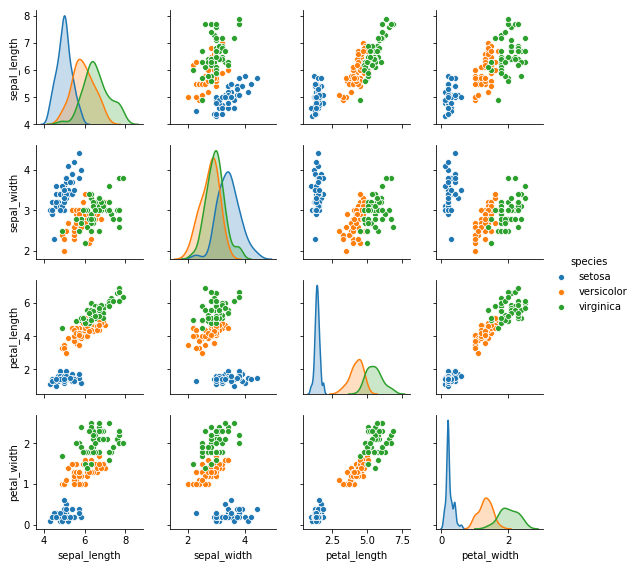

In [3]:
# Plot all features of iris against one another in a grid
sns.pairplot(iris, hue='species', height=2);

In [4]:
# Extract the features matrix and target array from the dataframe. Call them X and y.
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

## Scikit-learn's Estimator API

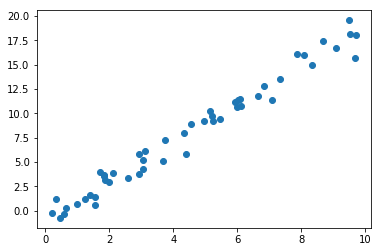

In [5]:
rng = np.random.RandomState(42)

# Make x, a len 50 vector with random uniformly distributed numbers with a mean of 5.
x = rng.rand(50) * 10

# Make y, a len 50 vector composed of normally distributed values scattered by x, with a coefficient of 2 and an intercept of -1
y = 2*x - 1 + rng.randn(50)

#Make a scatterplot of x and y
plt.scatter(x, y)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# Create model, an insantiation of a LinearRegression class
model = LinearRegression()

In [8]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Turn x, which is currently a one-dimensional array, into X, which is a properly-formatted features matrix
X = x[:, np.newaxis]

In [10]:
# Fit the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Look at the slope of the model
model.coef_

array([ 1.9776566])

In [12]:
# Look at the intercept of the model
model.intercept_

-0.90331072553111635

In [13]:
# Make an array, xfit, of 50 linearly spaced numbers between -1 and 11. This will be to fit the prediction.
xfit = np.linspace(-1, 11)
xfit.shape

(50,)

In [14]:
# Turn xfit into Xfit, a proper-looking features matrix for testing data
Xfit = xfit[:, np.newaxis]

In [15]:
# Have the model predict what values Xfit will fall into
yfit = model.predict(Xfit)

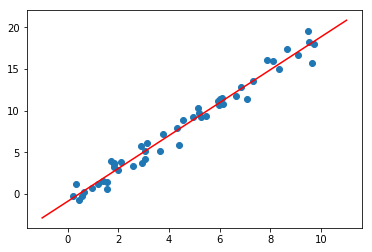

In [16]:
# Visualize the results
plt.scatter(x, y);
plt.plot(xfit, yfit, color='red')

### Brief break to learn the linear algebra behind linear regressions

In [17]:
# Summary: I kind of understand it now. Need to learn it better.
x = np.array([[1, 0], 
              [3, 4], 
              [2, 3]])

A = np.array([[1, 1], 
              [3, 1], 
              [2, 1]])

xline = [3, 2]
b = [0, 4, 3]

((np.dot(A, xline) - b)**2).sum()  # Equivalent by n-dimensional pythagorean theroem to the norm expression below
np.linalg.norm(np.dot(A, xline) - b) ** 2

99.0

### Supervised learning example: Iris classification

**Task**: Be able to classify new samples with reasonable accuracy. Use Gaussian naive Bayes to do this.

In [18]:
# Get the train_test_split function
from sklearn.cross_validation import train_test_split

In [19]:
# Use train_test_split to split iris data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)

In [25]:
# Grab the Gaussian naive Bayes model class
from sklearn.naive_bayes import GaussianNB

In [26]:
# Instantiate a model
model = GaussianNB()

In [28]:
# Fit model to data
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [35]:
# Predict on new data
y_model = model.predict(X_test)

In [39]:
# Figure out othe ratio accuracy of the model in predicting new information
out = y_model == y_test

In [41]:
# Figure out accuracy score by an imported function
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

1.0

### Unsupervised learning example: iris dimensionality

**Goal:** Use principal component analysis to reduce the dimensionality of the Iris dataset for plotting purposes.

In [42]:
# Grab the PCA model class
from sklearn.decomposition import PCA

In [50]:
# Make the model, give it 2 components as hyperparameters
model = PCA(n_components=2)

In [51]:
# Fit to data
model.fit(X_train, y_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

this next step is basically black magic

In [59]:
# Transform the fitted data
pca1 = model.transform(X_iris)[:, 0]
pca2 = model.transform(X_iris)[:, 1]

In [60]:
iris['pca1'] = pca1
iris['pca2'] = pca2

**Plot the results, colored by species, with seaborn**

In [63]:
iris.drop(['pca1', 'pca2'], axis=1).head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pca1,pca2
0,5.1,3.5,1.4,0.2,setosa,-2.478011,0.261301
1,4.9,3.0,1.4,0.2,setosa,-2.496158,-0.232267
2,4.7,3.2,1.3,0.2,setosa,-2.673418,-0.208767
3,4.6,3.1,1.5,0.2,setosa,-2.525399,-0.376579
4,5.0,3.6,1.4,0.2,setosa,-2.523469,0.265864


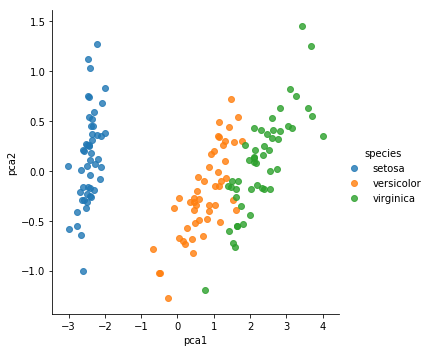

In [67]:
# Add the PCA results to the iris dataframe, plot
sns.lmplot('pca1', 'pca2', hue='species', data=iris, fit_reg=False);

So setosas are very different from versicolors and virginicas

### Unsupervised learning: iris clustering

**Goal:** Use a gaussian mixture model to model the iris data as a collection of Gaussian blobs.

In [219]:
# Grab the model class
from sklearn.mixture import GMM

In [220]:
# Instantiate the model with 3 components, covariance type of full


In [221]:
# Fit the model to the data


GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  tol=0.001, verbose=0)

In [222]:
# make y_gmm, a variable that determines the cluster labels.


In [225]:
# add y_gmm as a column to the iris dataframe


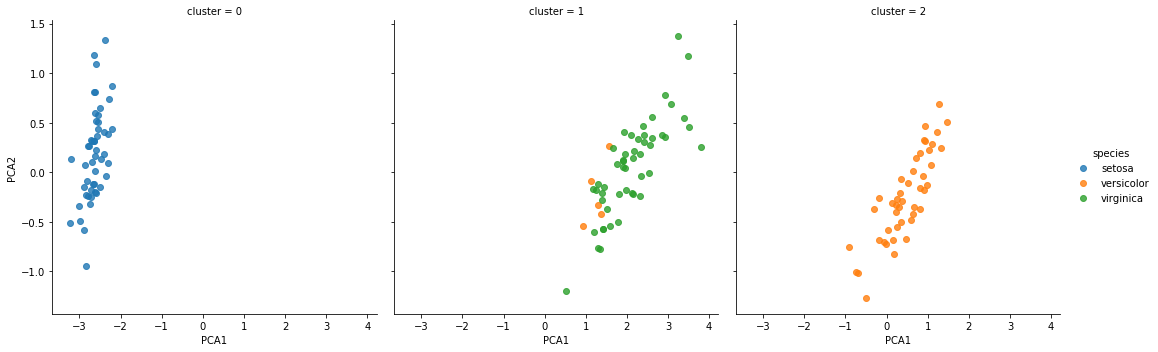

In [228]:
# Plot the results with seaborn, hued by color. 3 different horizontal graphs, one for each cluster.